# <span style="color:red"> QTM 151 - Quiz 4 </span>

### Submit as an HTML file
### Quiz is open 11:30am to 12:20pm

<font size = "4" >
This quiz is open book 

- You can use the lecture notes
- You will get partial credit for attempting the questions
- To get full credit, the code should work as intended
- You should <span style="color:red"> NOT </span> communicate with other students

Print the following message: <br>

"I will abide by Emory's code of conduct"

In [ ]:
# Write your answer here

print()

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

<font size = "5">

1. Fix an incorrect plot

<font size = "4">

In **Assignment 7** (questions 4 and 5) you used the ``statsmodels.formula.api`` to construct a linear model approximating the relationship between a car's weight and its mpg (miles per gallon).

In the code cell below, I use ``numpy`` to construct a **quadratic** model between these two variables:

$$ m_i \approx a\cdot w_i^2 + b\cdot w_i + c$$

where $m_i$ is the mpg of car $i$, $w_i$ is the weight of car $i$, and $a$, $b$, $c$ are the coefficients of the model. **Everything I do in the first cell is correct.**

In the second cell, I plot both the true data and a line plot of the quadratic model - which should look like a parabola. However, something is clearly off. Change the 2nd code cell so that the Best Quadratic Fit is plotted correctly. 

**For reference, here is what the plot *should* look like**

<img src="quiz_4_files/q1_expected.png" alt="drawing" width = "400"/>

In [2]:
# Everything in this cell is correct - do not change!
df_cars = pd.read_csv("quiz_4_files/features.csv")

independent_var = df_cars["weight"]
dependent_var = df_cars["mpg"]
model_degree = 2

a, b, c = np.polyfit(x = independent_var, y = dependent_var, 
    deg = model_degree)

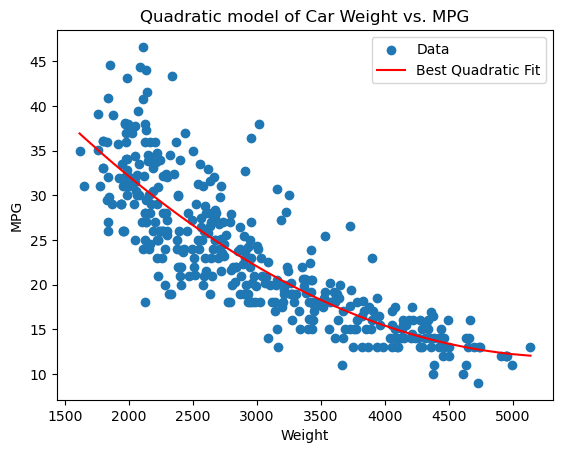

In [4]:
# RUN THE CELL ABOVE FIRST

# Change the code in this cell so that the correct plot is displayed

df_plot = df_cars.sort_values(by = "weight")

x_data = df_plot["weight"]

y_scatter = df_plot["mpg"]
y_line = a * df_plot["weight"]**2 + b * df_plot["weight"] + c


plt.scatter(x_data, y_scatter, label = "Data")
plt.plot(x_data, y_line, color = "red", label = "Best Quadratic Fit")
plt.legend()
plt.xlabel("Weight")
plt.ylabel("MPG")
plt.title("Quadratic model of Car Weight vs. MPG")
plt.show()


<font size = "5">

2. Plot multiple variables

<font size = "4">

- Read in the file ``DailyDelhiClimateTrain.csv`` and assign it to a DataFrame. This dataset contains weather data for the city of Delhi, India between January 1st, 2013 and January 1st, 2017.

- The "date" column is in string format, which we know is not ideal. Use ``pd.datetime`` to *replace* the "date" column with one that is in datetime64 format. (You do not need to worry about format codes here)

- Using a DataFrame's ``.plot()`` method, plot the following on a single figure:
    - Time vs. Mean Temperature
    - Time vs. Wind Speed

- Do **not** use Matplotlib.pyplot's ``.plot()`` function. Use the ``.plot()`` method connected to a DataFrame

<Axes: xlabel='date'>

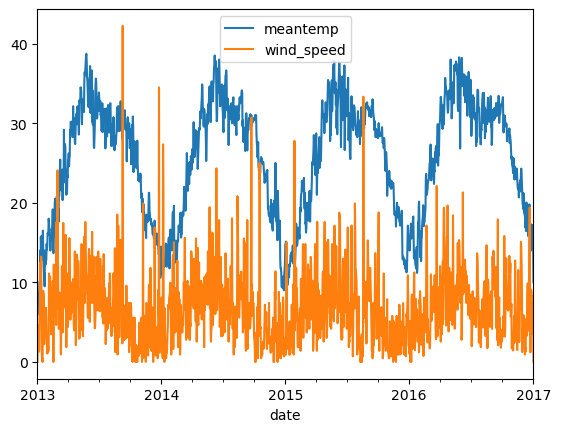

In [5]:
# SOLUTION

df_delhi = pd.read_csv("quiz_4_files/DailyDelhiClimateTrain.csv")

df_delhi["date"] = pd.to_datetime(df_delhi["date"])

df_delhi[["date", "meantemp", "wind_speed"]].set_index("date").plot()

<font size = "5">

3. Calculate and plot Percentage Growth

<font size = "4">

- Read in the file ``currencies.csv`` and assign it to a DataFrame. This dataset contains conversion rates to U.S. dollars for both the Euro and the British pound (gbp). The data ranges from January 4th, 1999 to March 31st, 2023.

- Convert the "date_string" column to datetime format, and add it as a new column of the DataFrame with the name "date"

- Compute the percentage growth for both currencies, saving them as new columns with the names "growth_euro" and "growth_gbp". Use both of the methods ``.diff()`` and ``.shift()`` in your computation.

- On a single figure, plot Time vs. both percentage growth values. Give the figure a legend and title, and label the x-axis and y-axis. You can use whichever plot function you would like.

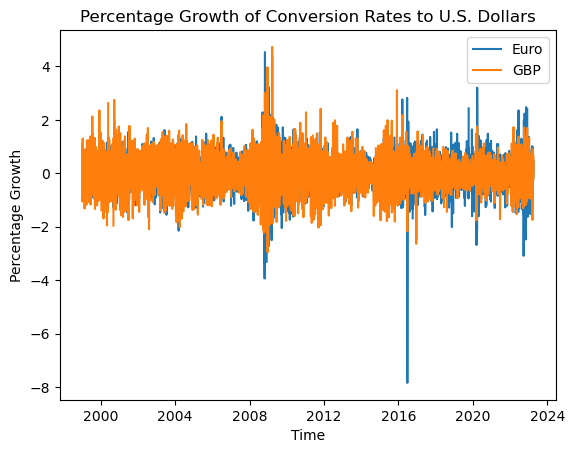

In [6]:
# SOLUTION

df_curr = pd.read_csv("quiz_4_files/currencies.csv")
df_curr["date"] = pd.to_datetime(df_curr["date_string"])

df_curr["growth_euro"] = (df_curr["eur_to_usd"].diff() / 
    df_curr["eur_to_usd"].shift(1)) * 100

df_curr["growth_gbp"] = (df_curr["gbp_to_usd"].diff() / 
    df_curr["gbp_to_usd"].shift(1)) * 100

plt.plot("date", "growth_euro", data = df_curr, label = "Euro")
plt.plot("date", "growth_gbp", data = df_curr, label = "GBP")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Percentage Growth")
plt.title("Percentage Growth of Conversion Rates to U.S. Dollars")
plt.show()

<font size = "5">

4. Boolean type column (11:30am Section)

<font size = "4">

Continue to use the DataFrame you created in question 3.

- Add a new column to the DataFrame of **Boolean** type. This column should contain "True" when the conversion rate for the Euro is **greater than** 1.9, and "False" otherwise.

- **Note**: This is a condition based on the value of the conversion rate (the original data) and **not** on the percentage growth.

In [7]:
df_curr["high_eur"] = df_curr["eur_to_usd"] > 1.9

<font size = "5">

4. Boolean type column (1:00pm section)

<font size = "4">

Continue to use the DataFrame you created in question 3.

- Add a new column to the DataFrame of **Boolean** type. This column should contain "True" when the conversion rate for the British Pound is **greater than** 1.5, and "False" otherwise.

- **Note**: This is a condition based on the value of the conversion rate (the original data) and **not** on the percentage growth.

In [7]:
df_curr["high_gbp"] = df_curr["gbp_to_usd"] > 1.5

<font size = "5">

5. Highlight using ``plt.fill_between`` (11:30am section)

<font size = "4">

Continue to use the DataFrame you created in question 3.

- Create a line plot of Time vs. Euro conversion rate (**not** percentage growth!). Using the ``plt.fill_between()`` function, highlight the regions where the conversion rate exceeded 1.9.

- Label both axes of the plot, and add a title.

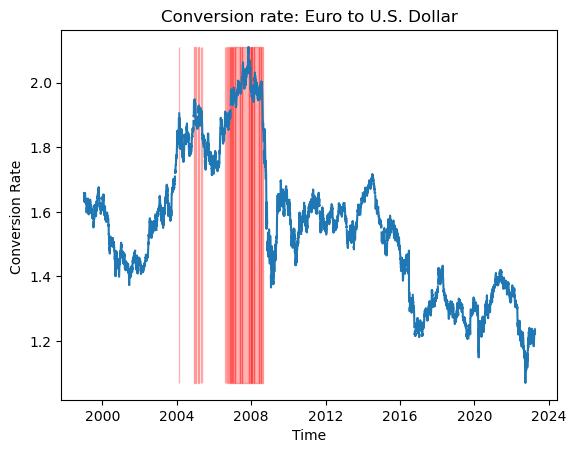

In [8]:
# Create a line plot
plt.plot("date", "eur_to_usd", data = df_curr)
plt.xlabel("Time")
plt.ylabel("Conversion Rate ")
plt.title("Conversion rate: Euro to U.S. Dollar")


x_vals = df_curr["date"]
y_vals = df_curr["eur_to_usd"]

val = 1.9

condition = df_curr["eur_to_usd"] > val


plt.fill_between(x = x_vals,
                 y1 = y_vals.min(),
                 y2 = y_vals.max(),
                 where = condition,
                 alpha = 0.3,color = "red")


plt.show()

<font size = "5">

5. Highlight using ``plt.fill_between`` (1:00pm Section)

<font size = "4">

Continue to use the DataFrame you created in question 3.

- Create a line plot of Time vs. British Pound conversion rate (**not** percentage growth!). Using the ``plt.fill_between()`` function, highlight the regions where the conversion rate exceeded 1.5.

- Label both axes of the plot, and add a title.

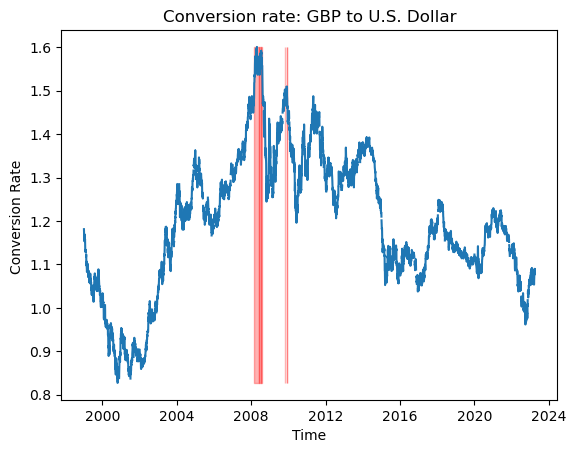

In [9]:
# Create a line plot
plt.plot("date", "gbp_to_usd", data = df_curr)
plt.xlabel("Time")
plt.ylabel("Conversion Rate ")
plt.title("Conversion rate: GBP to U.S. Dollar")


x_vals = df_curr["date"]
y_vals = df_curr["gbp_to_usd"]

val = 1.5

condition = df_curr["gbp_to_usd"] > val


plt.fill_between(x = x_vals,
                 y1 = y_vals.min(),
                 y2 = y_vals.max(),
                 where = condition,
                 alpha = 0.3,color = "red")


plt.show()

<font size = "5">

6. Numerically approximate a derivative.

<font size = "4">

The code cell below creates a DataFrame called ``df_trig`` with 3 columns, all of them numerical:

- The "time" column contains evenly spaced points between $0$ and $2\pi$. There are $N+1$ rows containing the values $t_0, t_1, t_2, \dots, t_N$
- The "sin" column contains the values of the sine function evaluated at these points: $\sin(t_0), \sin(t_1), \sin(t_2), \dots, \sin(t_N)$
- The "cos" column contains the values of the cosine function evaluated at these points: $\cos(t_0), \cos(t_1), \cos(t_2), \dots, \cos(t_N)$

Using the ``.diff()`` method, create a new column to the DataFrame named "d_sin_dt" based on the following formula:

$$\frac{\sin(t_{k+1}) - \sin(t_k)}{t_{k+1} - t_k}$$

According to calculus, for large enough $N$, this should approximate the value of $\cos(t_k)$. On a single figure, plot both "time" vs. "cos" and "time" vs. "d_sin_dt". Add a legend, labels the axes, and add a title.

For reference, the figure should look something like this for $N = 25$:

<img src="quiz_4_files/q6_expected.png" alt="drawing" width = "400"/>

**FYI:** If you change $N$ to have a larger value, the two curves should get closer together. For example, when $N = 200$, they virtually lie on top of each other. (You don't have to generate the plot for this case.)

In [10]:
N = 25

# Creates data frame - do not change
t_vals = np.linspace(0, 2*np.pi, N + 1)
sin_vals = np.sin(t_vals)
cos_vals = np.cos(t_vals)

data = {"time" : t_vals, "sin" : sin_vals, "cos" : cos_vals}
df_trig = pd.DataFrame(data)

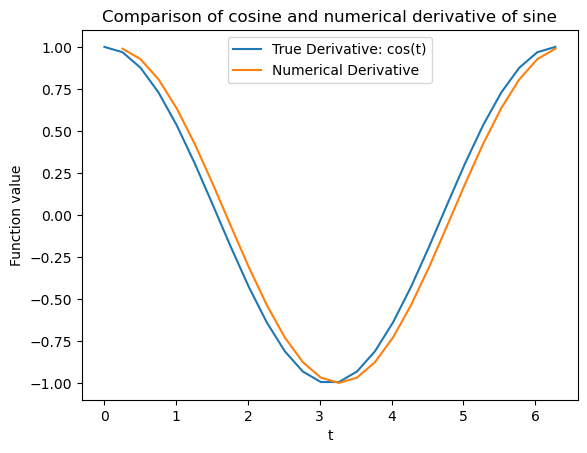

In [12]:
# your code here
df_trig["d_sin_dt"] = df_trig["sin"].diff() / df_trig["time"].diff()


ax = df_trig[["time", "cos", "d_sin_dt"]].set_index("time").plot()
ax.legend(["True Derivative: cos(t)", "Numerical Derivative"])
ax.set_xlabel("t")
ax.set_ylabel("Function value")
ax.set_title("Comparison of cosine and numerical derivative of sine")
plt.show()

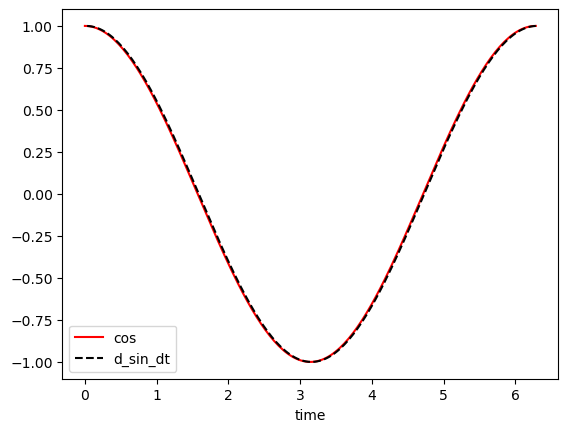

In [13]:
N = 200

# Creates data frame - do not change
t_vals = np.linspace(0, 2*np.pi, N + 1)
sin_vals = np.sin(t_vals)
cos_vals = np.cos(t_vals)

data = {"time" : t_vals, "sin" : sin_vals, "cos" : cos_vals}
df_trig = pd.DataFrame(data)

df_trig["d_sin_dt"] = df_trig["sin"].diff() / df_trig["time"].diff()


df_trig[["time", "cos", "d_sin_dt"]].set_index("time").plot(style=
    ["r-", "k--"])
plt.show()